In [64]:
import pandas as pd
import os
os.environ['PROJ_LIB'] = r'C:\Users\gargm\Anaconda3\pkgs\proj4-5.2.0-h6538335_1003\Library\share'

## for maps 
import numpy as np
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from datetime import datetime

In [16]:
source = "data/tmax-3/"

In [47]:
df = pd.DataFrame()
for files in os.listdir(source):
    df_file = pd.read_csv(source+files,compression='gzip',header=None,sep=',',quotechar='"',error_bad_lines=False)
    df = pd.concat([df,df_file],ignore_index=True)
df.columns = ['station','date','latitude','longitude','elevation','tmax']
df['station'] = df['station'].apply(str)
df.head()

,station,date,latitude,longitude,elevation,tmax
0,CA001017230,1980-02-06,48.6500,-123.6333,138.0,7.0
1,USC00365390,1986-03-12,39.8253,-75.4283,3.0,7.8
2,CA001017230,1980-02-19,48.6500,-123.6333,138.0,10.5
3,RSM00030405,1986-01-30,55.3830,101.0330,423.0,-19.8
4,RSM00030632,1980-02-24,53.8500,108.5800,458.0,-6.8


##### Task

a) Produce one or more figures that illustrate the max. temperature distribution over the entire globe and enable a comparison of different, non-overlapping time periods, e.g. to reveal temporal trends or patterns. Only show temperatures where you have data available. Take care to handle overplotting of multiple different values into the same point on the figure, which might happen when you have multiple measurements for the same station in a chosen period. By handle overplotting we mean, for instance, to aggregate your data to have a clear meaning for the value that is diplayed for a particular station, such as max. or average within the period.


In [48]:
df['year'] = df['date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').year)
# In order to prevent overplotting for the values across multiple stations, we find max of tmax 
df_by_station = df.groupby('station')
df_per_station = pd.DataFrame()
df_per_station['tmax'] = df_by_station['tmax'].max()
df_per_station['station'] = df_per_station.index
df_per_station['latitude'] = df_by_station['latitude'].mean()
df_per_station['longitude'] = df_by_station['longitude'].mean()
df_per_station.head()

,tmax,station,latitude,longitude
station,,,,
AEM00041217,38.1,AEM00041217,24.4330,54.6510
AFM00040938,31.5,AFM00040938,34.2100,62.2280
AG000060390,41.2,AG000060390,36.7167,3.2500
AG000060611,33.2,AG000060611,28.0500,9.6331
AG000060680,30.1,AG000060680,22.8000,5.4331


C:\Users\gargm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


(500, 500)
[38.1 31.5 41.2 ... 30.3 36.8 35.8]


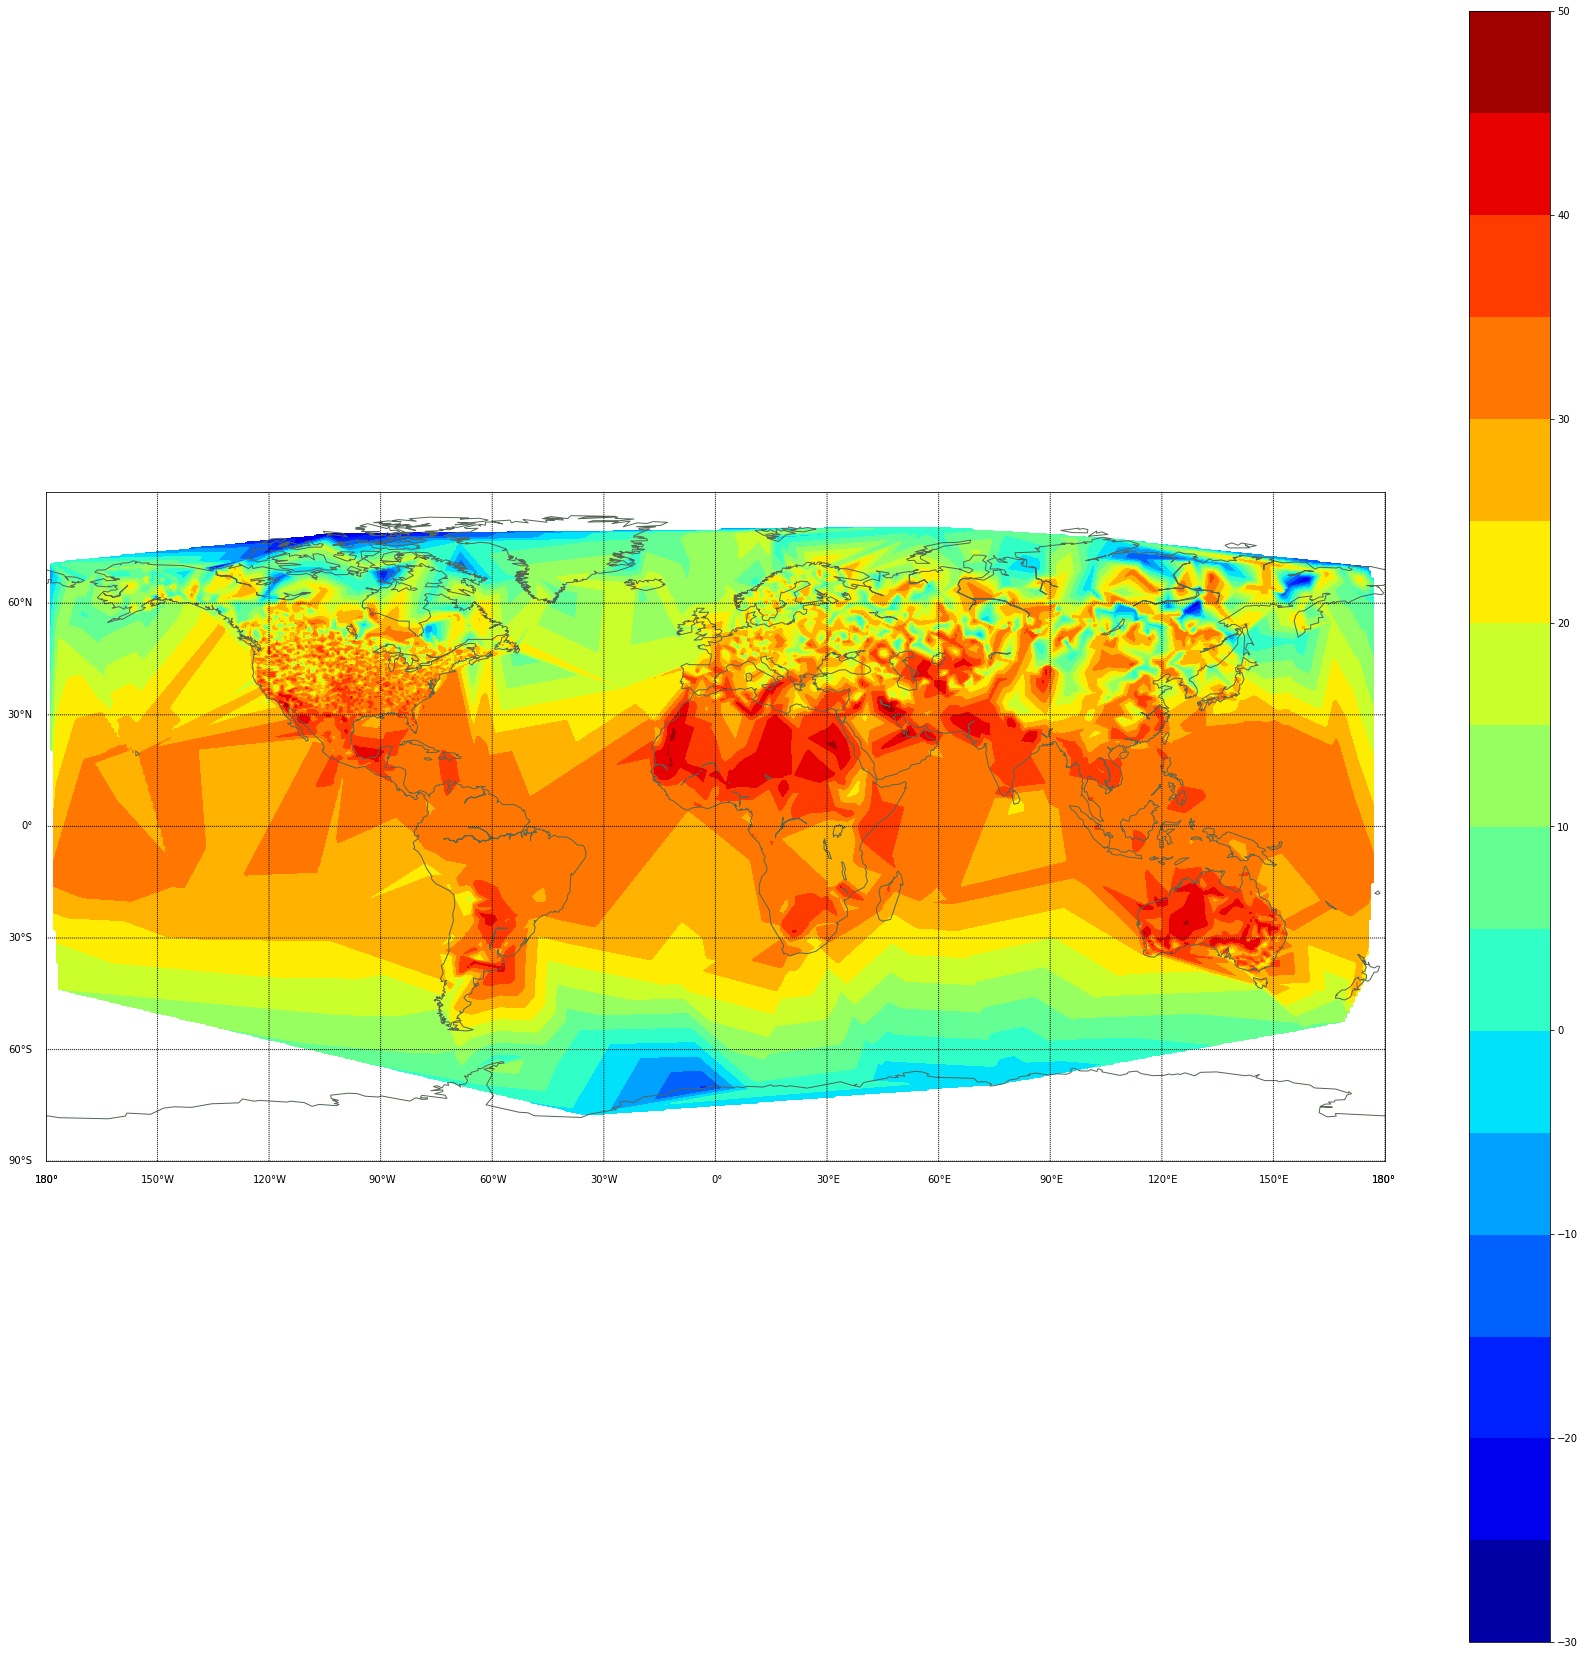

In [79]:


fig, ax = plt.subplots(figsize=(30,30))
mapp = Basemap(ax=ax)
mapp.drawcoastlines(color='#556655', linewidth=1)
mapp.drawparallels(np.arange( -90., 90.,30.),labels=[1,0,0,0],fontsize=10)
mapp.drawmeridians(np.arange(-180.,180.,30.),labels=[0,0,0,1],fontsize=10)
x,y = mapp(df_per_station['longitude'],df_per_station['latitude'])
x_i = np.linspace(df_per_station['longitude'].min(),df_per_station['longitude'].max(),500)
y_i = np.linspace(df_per_station['latitude'].min(),df_per_station['latitude'].max(),500)
z = np.array(df_per_station['tmax'])
#data_i = griddata((x,y),data,(x_i,y_i),method='linear')

zi = griddata((x, y), z, (x_i[None,:], y_i[:,None]), method='linear')
print(zi.shape)
plot = plt.contourf(x_i,y_i,zi,15,cmap=plt.cm.jet)
fig.colorbar(ax=ax,mappable=plot)
print(data)
plt.show()